In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import statistics

class LD:
    measurement = 0
    date = 1
    time = 2
    diameter = 3
    x = 4
    y = 5
    angsep = 6
    posang = 7
    orbittime = 8
    period = 9

In [2]:
# The following cell defines the primary utility functions to be used
# by the main() function.

In [3]:
def read_lab_data(filename):
    """
    This function reads through the .csv file of ASTR 1030 Lab 12.
    It then converts elements 2-8 into floats.
        > This excludes the measurement letter and date and the final column.
    
    Parameters:
    -----------
        filename : The file in question
            
    Returns:
    -----------
        return_list : The data processed into a nested list.
    
    """
    return_list = [] # Initializes return list
    file = open(filename, "r") # Opens file
    headers = file.readline() # Reads headers
    descriptions = file.readline() # Reads descriptions
    line = file.readline() # Initializes line reading
    
    while line:
        line_list = line.strip().split(",") # Strips and splits .csv line into a list
        
        idx = 2 # Initializes idx after date
        while idx < (len(line_list)-1): # Ensures typecasting loop ends before the final column
            line_list[idx] = float(line_list[idx]) # Typecasts each valid element
            idx += 1 # Updates idx variable
            
        return_list.append(line_list) # Appends typecasted line to return_list
        line = file.readline() # Updates the line reading
        
    file.close() # Closes file
    return return_list

def get_column_values(data, column):
    """
    This utility function returns a list of all values in the specified column.
    
    Parameters:
    -----------
        data : A nested list of data.
        column : The column of interest.
            
    Returns:
    -----------
        column_list : A list of each data point at the specified column.
    
    """
    column_list = [] # This initializes the return list
    idx = 0 # This initializes the row index
    while idx < len(data): # This loop will continue for each row in the data's nested list
        column_list.append(data[idx][column]) # This appends the column's value to the reurn list
        idx += 1 # Updates the row index
    return column_list

In [4]:
# The following blocks of code will define the graph-generating functions for each investigation.

In [5]:
def generate_graph_a(x_axis, y_axis):
    """
    This generates the graph for investigation 2.a.
    
    Parameters:
    -----------
        x_axis : The data for the x-axis, days since start of observations
        y_axis : The data for the y-axis, angular diameter in arcseconds
            
    Returns:
    -----------
        The desired graph
    
    """
    plt.scatter(x_axis, y_axis, c = "k", marker = ".") # This does the actual plotting and formatting of the points
    
    plt.title("2a. Angular diameter of Saturn over observation period 9/17/20-11/5/20") # This chunk is just labels and saving
    plt.xlabel("Days since start of observations")
    plt.ylabel("Angular diameter (arcseconds)")
    plt.savefig("output/plot2a.png", dpi = 275, bbox_inches = "tight")
    
    plt.show()
    
def generate_graph_b(x_axis, y_axis):
    """
    This generates the graph for investigation 2.b.
    
    Parameters:
    -----------
        x_axis : The data for the x-axis, x-position of Titan
        y_axis : The data for the y-axis, y-position of Titan
            
    Returns:
    -----------
        The desired graph
    
    """
    plt.scatter([0], [0], c = "k", marker = "o", label = "Center of Saturn") # This shows the center of saturn in the plot
    plt.scatter(x_axis, y_axis, c = "r", marker = ".", label = "Position of Titan")
    
    plt.title("2b. Position of Titan relative to center of Saturn at (0, 0)")
    plt.xlabel("x-position of Titan (arcseconds)")
    plt.ylabel("y-position of Titan (arcseconds)")
    plt.legend(bbox_to_anchor = (1, 1), loc = "upper left")
    plt.savefig("output/plot2b.png", dpi = 275, bbox_inches = "tight")
    
    plt.show()
    
def generate_graph_c(x_axis, y_axis):
    """
    This generates the graph for investigation 2.c.
    
    Parameters:
    -----------
        x_axis : The data for the x-axis, days since start of observations
        y_axis : The data for the y-axis, position angle of Titan
            
    Returns:
    -----------
        The desired graph
    
    """
    plt.scatter(x_axis, y_axis, c = "c", marker = ".")
    
    plt.title("2c. Position angle of Titan over observation period 9/17/20-11/5/20")
    plt.xlabel("Days since start of observations")
    plt.ylabel("Position angle (degrees)")
    plt.savefig("output/plot2c.png", dpi = 275, bbox_inches = "tight")
    
    plt.show()
    
def generate_graph_d(x_axis, y_axis):
    """
    This generates the graph for investigation 2.a.
    
    Parameters:
    -----------
        x_axis : The data for the x-axis, days into orbital period
        y_axis : The data for the y-axis, position angle of Titan
            
    Returns:
    -----------
        The desired graph
    
    """
    plt.scatter(x_axis, y_axis, c = "m", marker = ".")
    
    plt.title("2d. Position angle of Titan and days into orbit (16 day period)")
    plt.xlabel("Days into orbit")
    plt.ylabel("Position angle (degrees)")
    plt.savefig("output/plot2d.png", dpi = 275, bbox_inches = "tight")
    
    plt.show

In [6]:
def main():
    """
    This main() function just calls each utility and plotting function defined above.
    """
    lab_data = read_lab_data("Test2.csv")
    
    days = get_column_values(lab_data, LD.time)
    angular_diameter = get_column_values(lab_data, LD.diameter)
    generate_graph_a(days, angular_diameter)
    
    x_position = get_column_values(lab_data, LD.x)
    y_position = get_column_values(lab_data, LD.y)
    generate_graph_b(x_position, y_position)
    
    position_angle = get_column_values(lab_data, LD.posang)
    generate_graph_c(days, position_angle)
    
    orbit_days = get_column_values(lab_data, LD.orbittime)
    generate_graph_d(orbit_days, position_angle)

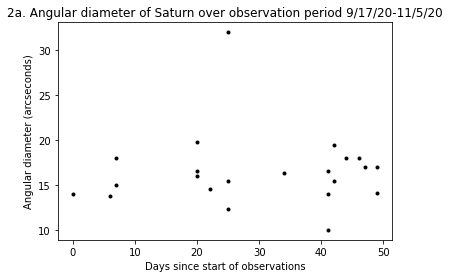

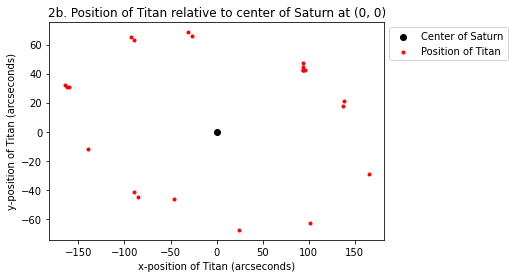

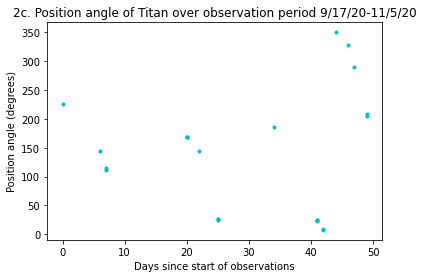

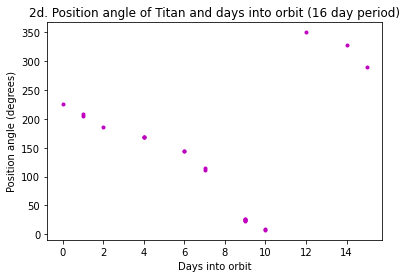

In [7]:
main()

In [8]:
def ang_d_avg():
    """
    This function just averages the angular diameter without the outlier for use in question 3b.
    """
    lab_data = read_lab_data("Test2.csv")
    ang_d = get_column_values(lab_data, LD.diameter)
    avg = (sum(ang_d) - 32) / (len(ang_d) - 1)
    return avg

In [9]:
ang_d_avg()

15.780952380952382